# Feature Selection

## 互分解 / 範例一:Compare cross decomposition methods


http://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html

這個範例目的是比較幾個互分解的方法。互分解運算主要是使用潛在變量模式（Latent variable modeling）分析來尋找兩個矩陣之間的主要相關成份。
對比於外顯變量（Manifest variable），也就是一般的觀察變量（Observational variable)，潛在變量是可能會影響實驗觀察的一個未知因素。

## (一)引入函式庫及內建手寫數字資料庫

引入之函式庫如下

1. matplotlib.pyplot: 用來繪製影像
2. sklearn.cross_decomposition: 互分解物件
3. PLSCanonical: Partial Least Squares 淨最小平方法
4. PLSRegression: PLS 淨最小平方迴歸法
5. CCA: Canonical correlation analysis 典型相關分析


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

#首先產生500筆常態分佈資料
n = 500
# 共有兩個潛在變量:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

# np.array([l1, l1, l2, l2]).shape = (4L, 500L) 
# latents 為 500 x 4 之矩陣
latents = np.array([l1, l1, l2, l2]).T

#接下來加入亂數形成X, Y矩陣
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n / 2]
Y_train = Y[:n / 2]
X_test = X[n / 2:]
Y_test = Y[n / 2:]

# numpy.corrcoef(x, y=None) 用來記算 Pearson product-moment 相關係數
print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[ 1.    0.48  0.02  0.  ]
 [ 0.48  1.    0.02 -0.02]
 [ 0.02  0.02  1.    0.51]
 [ 0.   -0.02  0.51  1.  ]]
Corr(Y)
[[ 1.    0.49 -0.01  0.05]
 [ 0.49  1.   -0.06  0.06]
 [-0.01 -0.06  1.    0.53]
 [ 0.05  0.06  0.53  1.  ]]


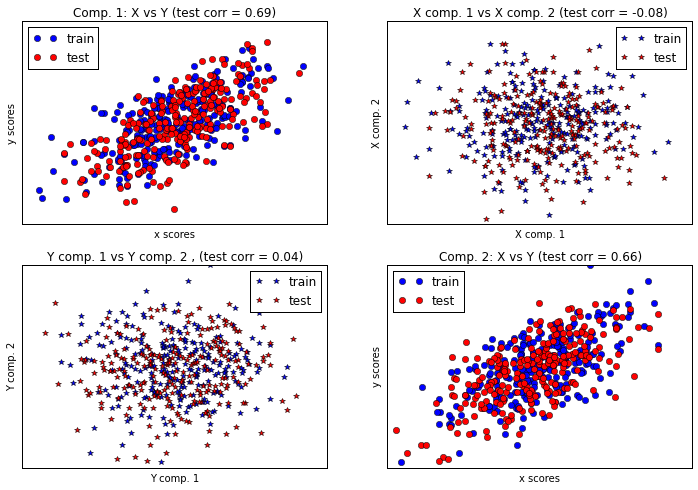

In [11]:
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
#figure = plt.figure(figsize=(30,20), dpi=300)
plt.figure(figsize=(12, 8), dpi=600)
plt.subplot(221)
plt.plot(X_train_r[:, 0], Y_train_r[:, 0], "ob", label="train")
plt.plot(X_test_r[:, 0], Y_test_r[:, 0], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.plot(X_train_r[:, 1], Y_train_r[:, 1], "ob", label="train")
plt.plot(X_test_r[:, 1], Y_test_r[:, 1], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.plot(X_train_r[:, 0], X_train_r[:, 1], "*b", label="train")
plt.plot(X_test_r[:, 0], X_test_r[:, 1], "*r", label="test")
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.plot(Y_train_r[:, 0], Y_train_r[:, 1], "*b", label="train")
plt.plot(Y_test_r[:, 0], Y_test_r[:, 1], "*r", label="test")
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:

###############################################################################
# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

###############################################################################
# PLS regression, with univariate response, a.k.a. PLS1

n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)
# note that the number of compements exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

###############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   1.   1. ]
 [ 2.   1.9  2. ]
 [ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [ 0.   0.  -0.1]
 [ 0.   0.   0. ]
 [ 0.   0.   0.1]
 [ 0.   0.   0. ]
 [ 0.   0.   0. ]]
Estimated betas
[[ 1. ]
 [ 2. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [-0.1]
 [ 0. ]
 [ 0. ]]


## (四)完整程式碼

Python source code: plot_compare_cross_decomposition.py

http://scikit-learn.org/stable/_downloads/plot_compare_cross_decomposition.py

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

###############################################################################
# Dataset based latent variables model

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n / 2]
Y_train = Y[:n / 2]
X_test = X[n / 2:]
Y_test = Y[n / 2:]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

###############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(X_train_r[:, 0], Y_train_r[:, 0], "ob", label="train")
plt.plot(X_test_r[:, 0], Y_test_r[:, 0], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.plot(X_train_r[:, 1], Y_train_r[:, 1], "ob", label="train")
plt.plot(X_test_r[:, 1], Y_test_r[:, 1], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.plot(X_train_r[:, 0], X_train_r[:, 1], "*b", label="train")
plt.plot(X_test_r[:, 0], X_test_r[:, 1], "*r", label="test")
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.plot(Y_train_r[:, 0], Y_train_r[:, 1], "*b", label="train")
plt.plot(Y_test_r[:, 0], Y_test_r[:, 1], "*r", label="test")
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

###############################################################################
# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

###############################################################################
# PLS regression, with univariate response, a.k.a. PLS1

n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)
# note that the number of compements exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

###############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)